## Test-a-Perceptual-Phenomenon
## Background Information
In a Stroop task, participant are presented with a list of words, with each word displayed in a color of ink. The participant's task is to say out loud the color of the ink in which the word is printed.The task has two conditions: a congruent word condition, and an incongruent word condition. In the congruent word condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the color in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized list. Each participant will go through and record a time from each condition.

## Analysis
#### Question 1: 
What are our dependent and independent variables?
#### Answer:
The dependent variable is response time each participant takes to name the ink color. The independent variable is the the congruency condition 
 
#### Question 2: 
What is an appropriate set of hypotheses for this task? What kind of statistical test do you                  expect to perform? Justify your choices.
#### Answer:
Null Hypothsis, H0 - No change in time between two reading tasks (congruent or incongruent)
Alternate Hypothesis, H1 - incongruent task take more time than congruent.
H0: μi ≤ μc (μi # population mean of incongruent values, μc - population mean of congruent values)

H1: μi > μc (μi - population mean of incongruent values, μc - population mean of congruent values)

statistical test dependent t-test (two tailed)

We need to compare the means of two related groups to determine the statistically significant difference between two means.

We are assuming distributions are nearly normal and we are comparing 2 dependent samples of data
our sample size less than 30 and we don't know the population standard deviations

#### Question 3: 
Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [11]:
#Import 
import math
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import t as pt
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
#Read the data from the csv file.
data = pd.read_csv("stroopdata.csv")
#Print the data from the csv file.
data


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [7]:
#Find the mean, meadian, and standard deviation for congruent and incongruent variables.
#Find the mean.
c_mean = data['Congruent'].mean()
i_mean = data['Incongruent'].mean()
#Find the median.
c_median = data['Congruent'].median()
i_median = data['Incongruent'].median()
#Find the standard deviation.
c_std = data['Congruent'].std()
i_std = data['Incongruent'].std()
#Set up the table to print mean, median, and standard deviation.
ls = [[int(24),int(24)],[c_mean,i_mean],[c_median,i_median],[c_std,i_std]]
detail = pd.DataFrame(ls, index=['Sample Size', 'Mean', 'Median', 'Standard Deviation'])
#Print the data in a table.
detail


,0,1
Sample Size,24.000000,24.000000
Mean,14.051125,22.015917
Median,14.356500,21.017500
Standard Deviation,3.559358,4.797057


In [8]:
#Getting more detail about the dataset.
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


#### Question 4: 
Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

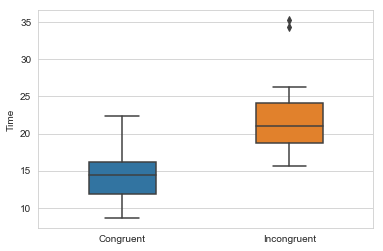

In [12]:
#Create a boxplot for the datasets.
sns.set_style("whitegrid")
sns.boxplot(data=data[['Congruent', 'Incongruent']], orient="v", width=0.4, )
plt.ylabel("Time");

### Outcome:
The box plot clearly displays the difference between the median of the congruent and incongruent datasets.
As we can see in the box plot the distribution of time taken to name the color for congruent words is between 8 to 23 seconds. The distribution of time taken to name the color for incongruent words is between 16 to 36 seconds. There are also two outliers in the distribution of incongruent words.

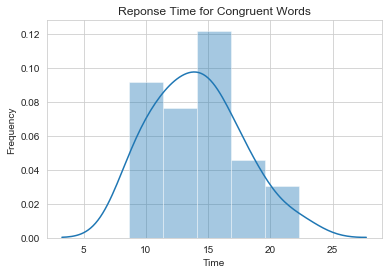

In [14]:
#Plot a graph for the congruent dataset.
sns.distplot(data['Congruent'])
#Create the xlabel.
plt.xlabel("Time");
#Create the ylable.
plt.ylabel("Frequency");
#Create the title.
plt.title("Reponse Time for Congruent Words");


The data is more or less normally distributed and the middle of the data is a little less than 15.

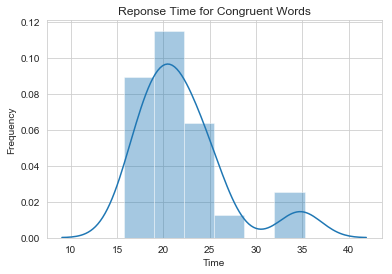

In [15]:
#Create a boxplot for the incongruent dataset.
sns.distplot(data['Incongruent'])
#Create the xlabel.
plt.xlabel("Time");
#Create the ylabel.
plt.ylabel("Frequency");
#Create the title.
plt.title("Reponse Time for Congruent Words");


There are some interesting data points on the upper end of this distribution that skew it right.

Although both graphs visually appear somewhat positively skewed,
the mean is pretty close to the peak in both graphs which would indicate a normal distribution

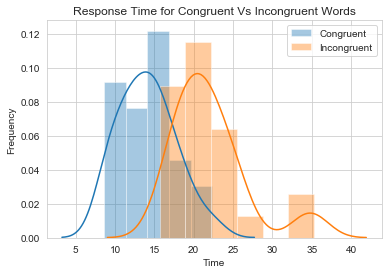

In [17]:
#Compare the data sets and create a graph.
#Create the graph.
sns.distplot(data['Congruent'], label = "Congruent")
sns.distplot(data['Incongruent'], label = "Incongruent")
#Create the xlabel.
plt.xlabel("Time");
#Create the ylabel.
plt.ylabel("Frequency");
#Create the title.
plt.title("Response Time for Congruent Vs Incongruent Words");
#Create the legend.
plt.legend();


#### Question 5: 
Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

#### Answer:

The Test is two tailed t- test so find the critical value of t at 95% confidence level.
Sample Size(n) = 24
Degree of freedom(df) = n - 1 = 23

In [27]:
#Find the T-critical value for 95% confidence interval and 23 degree of freedom for the two tailed test.
print "T-critical value for two tailed test is:",round(pt.ppf(0.95,23),4)

T-critical value for two tailed test is: 1.7139


In [20]:
#Find the difference between the datasets.
data['difference'] = data['Congruent'] - data['Incongruent']
#Print the data.
data

,Congruent,Incongruent,difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134
5,12.238,20.878,-8.640
6,14.692,24.572,-9.880
7,8.987,17.394,-8.407
8,9.401,20.762,-11.361
9,14.480,26.282,-11.802


In [29]:
#std and mean of the differences in the dataset.
#Standard deviation
s_std = data['difference'].std()
print "Standard Deviation for the differences in the dataset: ", round(s_std,4)
#Mean
s_mean = c_mean - i_mean
print "Mean of the differences: ", round(s_mean,4)

Standard Deviation for the differences in the dataset:  4.8648
Mean of the differences:  -7.9648


For two tailed t-test at 95% confidence level
Sample size(n) = 24
Degree Of Freedom(df) = 23
t - critical ( tcritical) = ∓2.069
Standerd Deviation(SD) = 4.8648
Mean of difference data (x̄) = -7.9648
Confidance Interval(CI) at 95% level = (-10.019028, -5.910555)

In [25]:
#Calculate the t value.
t_value = s_mean/(s_std/math.sqrt(24))
print"t-Value is: ",t_value

t-Value is:  -8.02070694411
